In [3]:
import os
dr = 'Data'
os.listdir(dr)

['test', 'train']

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from matplotlib.image import imread

In [6]:
test_path = dr + '/test/'
train_path = dr +'/train/'

In [7]:
test_path

'Data/test/'

In [8]:
os.listdir(train_path)

['0',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [9]:
os.listdir(train_path+'A')[0]

'0.jpg'

In [10]:
a_cell=train_path+'A/'+'0.jpg'
a1=imread(a_cell)
a1.shape

(310, 310)

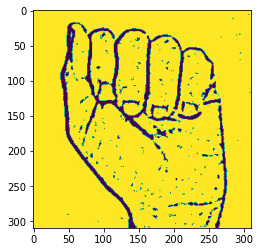

In [11]:
plt.imshow(a1)

In [12]:
 os.listdir(train_path+'0')[0]

'0.jpg'

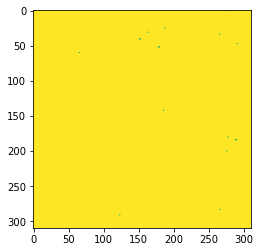

In [13]:
not1=imread(train_path+'/0/0.jpg')
plt.imshow(not1)

In [14]:
image_shape = (310,310)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_train_gen = ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
image_test_gen = ImageDataGenerator(rescale=1./255)

In [16]:
#image_train_gen.flow_from_directory(train_path)

In [17]:
#image_test_gen.flow_from_directory(test_path)

In [18]:
from tensorflow.keras.models import Sequential, load_model, model_from_json
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [24]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape = (310,310,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),input_shape = (310,310,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),input_shape = (310,310,1)))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())

#model.add(Dense(256,activation='relu'))
#model.add(Dropout(0.4))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(96,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(27,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 308, 308, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 154, 154, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 152, 152, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 76, 76, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 74, 74, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43808)             0

In [26]:
batch_size = 5
train_image_gen = image_train_gen.flow_from_directory(train_path,
                                               target_size=image_shape,
                                               color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 12845 images belonging to 27 classes.


In [27]:
test_image_gen = image_test_gen.flow_from_directory(test_path,
                                               target_size=image_shape,
                                               color_mode='grayscale',
                                               batch_size=2,
                                               class_mode='categorical',
                                              shuffle=False)
tg= image_test_gen.flow_from_directory(test_path,
                                               target_size=image_shape,
                                               color_mode='grayscale',
                                               batch_size=2,
                                               class_mode='categorical',
                                              shuffle=False)

##imgs = np.concatenate([tg.next() for i in range(tg.samples)])
##imgx=np.concatenate([tg.next()[0] for i in range(tg.__len__())])
#imgy=np.concatenate([tg.next()[1] for i in range(tg.__len__())])
#print(imgx.shape)
#print(imgy.shape)

Found 4268 images belonging to 27 classes.
Found 4268 images belonging to 27 classes.


In [28]:
 test_image_gen.class_indices

{'0': 0,
 'A': 1,
 'B': 2,
 'C': 3,
 'D': 4,
 'E': 5,
 'F': 6,
 'G': 7,
 'H': 8,
 'I': 9,
 'J': 10,
 'K': 11,
 'L': 12,
 'M': 13,
 'N': 14,
 'O': 15,
 'P': 16,
 'Q': 17,
 'R': 18,
 'S': 19,
 'T': 20,
 'U': 21,
 'V': 22,
 'W': 23,
 'X': 24,
 'Y': 25,
 'Z': 26}

In [29]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [27]:
results = model.fit(train_image_gen, steps_per_epoch=2569, epochs=10, validation_data=test_image_gen, validation_steps=2134, callbacks=[early_stop])

Epoch 1/5
2569/2569 [==============================] - 1433s 558ms/step - loss: 3.2967 - accuracy: 0.0380 - val_loss: 3.2958 - val_accuracy: 0.0382
Epoch 2/5
2569/2569 [==============================] - 1233s 480ms/step - loss: 3.2969 - accuracy: 0.0355 - val_loss: 3.2956 - val_accuracy: 0.0391
Epoch 3/5
2569/2569 [==============================] - 1218s 474ms/step - loss: 3.2964 - accuracy: 0.0377 - val_loss: 3.2957 - val_accuracy: 0.0389
Epoch 4/5
2569/2569 [==============================] - 1203s 468ms/step - loss: 3.2969 - accuracy: 0.0377 - val_loss: 3.2956 - val_accuracy: 0.0389
Epoch 5/5
2569/2569 [==============================] - 1083s 421ms/step - loss: 3.2966 - accuracy: 0.0354 - val_loss: 3.2955 - val_accuracy: 0.0387


In [28]:
model.evaluate(test_image_gen)

2134/2134 [==============================] - 71s 33ms/step - loss: 3.2955 - accuracy: 0.0387


[3.295454502105713, 0.03865979239344597]

In [29]:
fmodel_json = model.to_json()
with open("fourth_model.json", "w") as json_file:
    json_file.write(fmodel_json)
print('Model Saved')
model.save_weights('fourth_model.h5')
print('Weights saved')

Model Saved
Weights saved


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
pred = model.predict(test_image_gen)
#print(classification_report(test_image_gen.class_indices, pred))

In [ ]:
from tensorflow.keras.utils import to_categorical
predhot = to_categorical(pred)
p=pred.reshape(-1,1)
p=np.array(p)
p.shape

In [47]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

In [48]:
target_names = []

for key in train_image_gen.class_indices:

    target_names.append(key)

In [32]:
print(classification_report(yn, p))

NameError: name 'yn' is not defined

In [ ]:
import itertools
Y_pred = model.predict_generator(test_image_gen)

y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')

cm = confusion_matrix(test_image_gen.classes, y_pred)

plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [ ]:
confusion_matrix(yn,p)

In [ ]:
print('Classification Report')

print(classification_report(test_image_gen.classes, y_pred, target_names=target_names))

In [ ]:
df_cm = pd.DataFrame(confusion_matrix(yn,p), index = [i for i in "0ABCDEFGHIJKLMNOPQRSTUVWXYZ"],
                  columns = [i for i in "0ABCDEFGHIJKLMNOPQRSTUVWXYZ"])
plt.figure(figsize = (30,15))
sns.heatmap(df_cm, annot=True)

In [ ]:
metrics = pd.DataFrame(results.history)
metrics[['loss','val_loss']].plot()

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

In [30]:
json_file1 = open("third_model.json", "r")
model_json1 = json_file1.read()
json_file1.close()
model = model_from_json(model_json1)
model.load_weights("third_model.h5")

In [31]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [32]:
model.evaluate(test_image_gen)

2134/2134 [==============================] - 138s 64ms/step - loss: 0.0293 - accuracy: 0.9918


[0.029284851625561714, 0.9917994141578674]

In [33]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

In [34]:
target_names = []

for key in train_image_gen.class_indices:

    target_names.append(key)

In [35]:
import itertools
Y_pred = model.predict_generator(test_image_gen)

y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')

cm = confusion_matrix(test_image_gen.classes, y_pred)

plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

C:\Users\rauna\anaconda3\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix


NameError: name 'confusion_matrix' is not defined

In [36]:
print('Classification Report')

print(classification_report(test_image_gen.classes, y_pred, target_names=target_names))

Classification Report


NameError: name 'classification_report' is not defined